# Calculation of intrinsic and total efficiencies for circular side of the detector

## Geometrical efficiency calculated from the previous part

In [1]:
import math
import numpy
from matplotlib import pyplot as plt
import pandas as pd
R=2.54
t=0.015
y=1
z=0
x_positions=[]
geo_eff_cir=[]
for i in numpy.arange(-2, 2.2, 0.2): 
    x_positions.append(i)
    geo_eff=0.5*(1-math.cos(numpy.arctan((R+t)/y)))*(y/math.sqrt(i*i + y*y + z*z))
    geo_eff_cir.append(geo_eff) 
print(geo_eff_cir)



with open("cir_geo_twoin.csv", "w") as out_file:
     for number in geo_eff_cir:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_geo_twoin.csv",names=['Calculation'])
data.to_csv("cir_geo_twoinupdated.csv")


for number in geo_eff_cir:
    print(number)

plt.scatter(x_positions,geo_eff_cir, color="none", edgecolor="red", label="Experimental")
plt.xlabel('Radial position x (cm)')
plt.ylabel('Geometrical efficiency (%)')
plt.savefig("cirtwo_geo.pdf",bbox_inches='tight')
plt.show()

[0.14210926224403175, 0.15432079739586313, 0.16841562759238127, 0.18469771878275149, 0.20342881712876315, 0.22469447264865566, 0.2481335351517391, 0.27248207183025464, 0.2950382968679147, 0.31159517017233423, 0.31776597060999934, 0.3115951701723343, 0.2950382968679148, 0.2724820718302547, 0.24813353515173925, 0.22469447264865577, 0.20342881712876323, 0.18469771878275154, 0.16841562759238135, 0.1543207973958632, 0.1421092622440318]
0.14210926224403175
0.15432079739586313
0.16841562759238127
0.18469771878275149
0.20342881712876315
0.22469447264865566
0.2481335351517391
0.27248207183025464
0.2950382968679147
0.31159517017233423
0.31776597060999934
0.3115951701723343
0.2950382968679148
0.2724820718302547
0.24813353515173925
0.22469447264865577
0.20342881712876323
0.18469771878275154
0.16841562759238135
0.1543207973958632
0.1421092622440318
0.14210926224403175
0.15432079739586313
0.16841562759238127
0.18469771878275149
0.20342881712876315
0.22469447264865566
0.2481335351517391
0.27248207183

<Figure size 640x480 with 1 Axes>

## Calculation of the survival probability of photon inside the cover layer (similar to the cylindrical side)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


0.1555102709637914
0.1507876562511535
0.14684371868255436
0.14359280538691646
0.14095269196311372
0.13884884330234895
0.13721672080119007
0.1360029374841101
0.13516578232307486
0.13467542240254665
0.13451395756247592
0.1346754224025467
0.13516578232307488
0.13600293748411002
0.13721672080119013
0.13884884330234887
0.14095269196311358
0.14359280538691646
0.14684371868255439
0.15078765625115353
0.15551027096379144


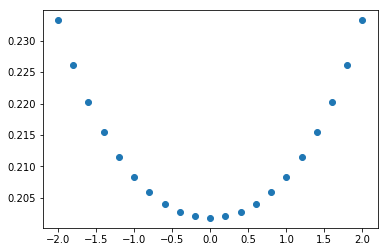

In [2]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.20979
R=2.54
t=0.015
h=5.1
z=1
i=0



integral1=[]
integral2=[]
integral_survive=[]
y_positions=[]
products=[]



for j in numpy.arange(-2, 2.2, 0.2):
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                
                    alpha=numpy.arcsin(abs(i)/R)
                 
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
              
                    
                    
   
             
#Definition of the limits of the intigration for the left side of the cylinder           
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                   
                    
#Definition of the limits of the intigration for the right side of the cylinder   
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f1(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                   
                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_survive=zip(integral1,integral2)
integral_survive = [sum(k) for k in sum_survive]
for number in integral_survive:
    print(number)
integral_survive=[x*1.5 for x in integral_survive]

plt.plot(y_positions,integral_survive, 'o')
plt.show()

## Calculation of interaction probability of the photon with crystal 

In [3]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.015
h=5.1
z=1
average=0
suma=0
i=0



integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]


for j in numpy.arange(-2, 2.2, 0.2):
        
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                 
                    alpha=numpy.arcsin(abs(i)/R)
                
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
                 
                    
                    
   
             
#Determination of the limits of the integral            
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                  
    
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f1(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                     
                    
                   
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


367.7416165740202
338.63951809254127
312.3753554284991
289.0404118154395
268.70863728010005
251.4359542098825
237.2625572315535
226.21612730593472
218.31489864292618
213.57013960564302
211.98791729312214
213.57013960564313
218.31489864292627
226.21612730593444
237.26255723155353
251.43595420988214
268.7086372800998
289.04041181543954
312.3753554284992
338.63951809254127
367.7416165740202


## Calculation of the intrinsic detection efficiency of the detecor for the circular side of that

-----------------------------
Thease are the products
85.78139765713286
76.59398887079158
68.80553822385818
62.25618540415289
56.812808667555
52.36738710999685
48.83458510832769
46.149086729829804
44.26305610178087
43.143973145941246
42.77300056578703
43.14397314594129
44.2630561017809
46.14908672982971
48.83458510832771
52.367387109996734
56.8128086675549
62.2561854041529
68.8055382238582
76.5939888707916
85.78139765713287
THIS IS COEFFICIENT1
[0.482885, 0.5337810000000001, 0.602176, 0.629336, 0.658145, 0.692677, 0.7606, 0.8217, 0.8957, 0.9669]
These are the elements of products: 
41.4225502076646
40.88441597344001
41.43304378549003
39.18005869750796
37.39106596050798
36.273684601191285
37.143585433394044
37.92070456590115
39.64641935036513
41.71590763481059
42.77300056578703
41.715907634810634
39.64641935036515
37.920704565901076
37.14358543339406
36.273684601191206
37.391065960507916
39.180058697507974
41.43304378549004
40.88441597344002
41.42255020766461
This is the end of the elem

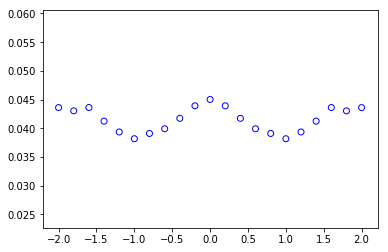

In [4]:
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(integral_survive,integral_interact):
    total_num=(num1*num2)
    products.append(total_num)
print("-----------------------------")
print("Thease are the products")
for i in products:
    print(i)
    
    
products1=[]   


First_sublist=products[0:10]
Second_sublist=products[11:21]

Coefficient1=[0.5681*0.85, 0.59309*0.9, 0.6208*0.97, 0.6488*0.97, 0.6785*0.97, 0.7141*0.97, 0.7606, 0.8217, 0.8957, 0.9669]
Coefficient1 = [x * 1 for x in Coefficient1]
def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

Coefficient2=Reverse(Coefficient1)


print("THIS IS COEFFICIENT1")
print(Coefficient1)


for num1, num2 in zip(First_sublist,Coefficient1):
    list_one=(num1*num2)
    products1.append(list_one)
    
    
products2=[i*1 for i in products[10:11]]
for number in products2:
     products1.append(number)
        

for num1, num2 in zip(Second_sublist,Coefficient2):
    list_two=(num1*num2) 
    products1.append(list_two)
    



    
print("These are the elements of products: ")
for i in products1:
    print(i)
print("This is the end of the elements of products")


for number in products1:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 


intrinsic_eff=[]
for i in products1:
    intrinsic_eff.append(i/950)
    
with open("cir_intr_twoin.csv", "w") as out_file:
     for number in intrinsic_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_intr_twoin.csv",names=['Calculation'])
data.to_csv("cir_intr_twoinupdated.csv")

    
plt.scatter(y_positions, intrinsic_eff, color="none", edgecolor="blue")
#plt.xlim(-1.9,1.9)
#plt.errorbar(x_positions, products1, yerr=er, capsize=3,ls='none')
#plt.ylim(0.022,0.043)
plt.savefig("cirtwo_intr.pdf", bbox_inches='tight')
plt.show()

## Calculation of the absolute detection efficiency of the detector for the circular side of the detector

0.006196345316081663
0.006641384920089922
0.007345233760206227
0.007617334171793707
0.008006758231083894
0.008579469928935091
0.009701651749261795
0.010876539100399728
0.012312854781097754
0.013682605619328613
0.01430716214809407
0.013682605619328629
0.012312854781097763
0.010876539100399709
0.009701651749261804
0.008579469928935077
0.008006758231083882
0.007617334171793713
0.007345233760206233
0.006641384920089928
0.006196345316081667


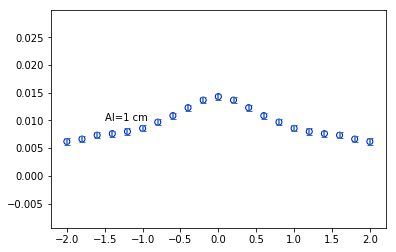

In [5]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.015
h=5.1
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
z=1
average=0
suma=0

for i in numpy.arange(-2, 2.2, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-2, 2.2, 0.2):
        y_positions.append(j) 
        

                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)


integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geo_eff_cir,intrinsic_eff):
    total_num=(num1*num2)
    products.append(total_num)
for number in products:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 

with open("cir_total_twoin.csv", "w") as out_file:
     for number in products:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_total_twoin.csv",names=['Calculation'])
data.to_csv("cir_total_twoinupdated.csv")
    
plt.scatter(x_positions, products, color="none", edgecolor="blue")
plt.errorbar(x_positions, products, yerr=er, capsize=3,ls='none')
plt.text(-1.5, 0.01, 'Al=1 cm')
#plt.ylim(0.01,0.045)
plt.savefig("cirtwo_total.pdf", bbox_inches='tight')
plt.show()